/tmp/ipykernel_32157/2168926835.py:10: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  ecg_signal = electrocardiogram()


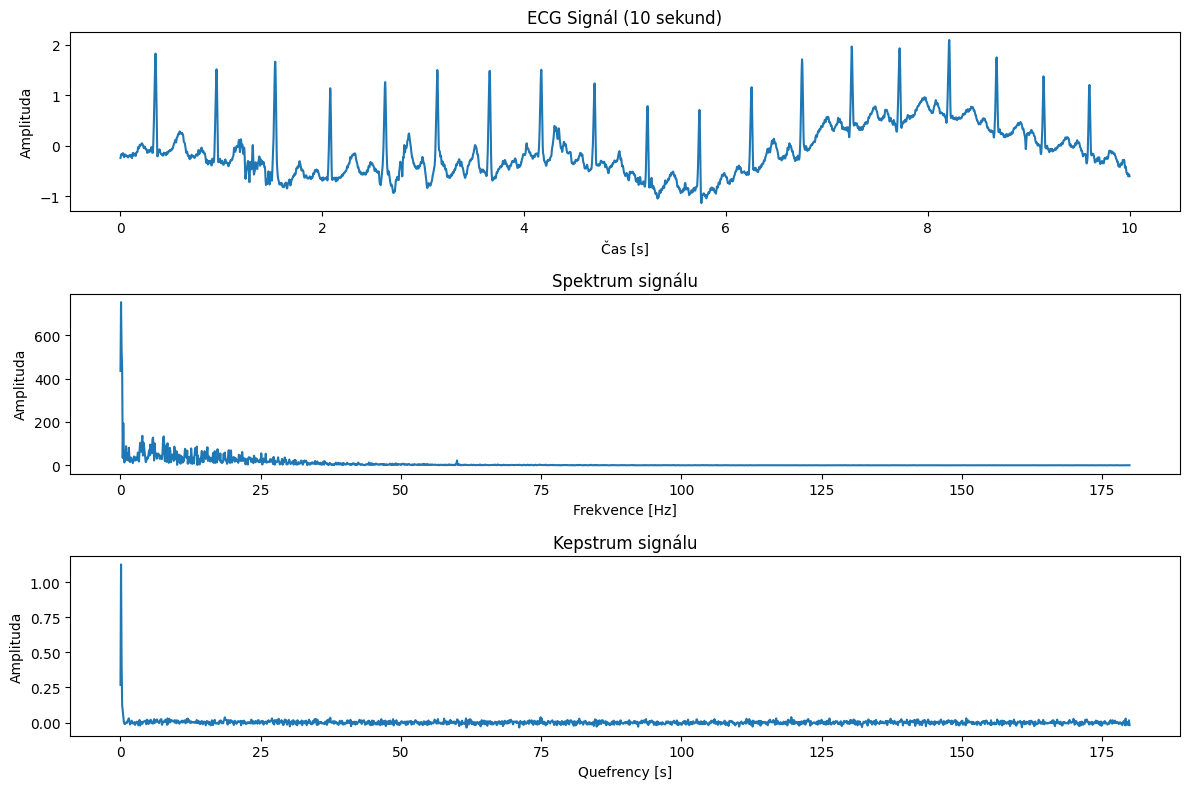

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, resample
from scipy.io import loadmat

# Načti ECG signál z Scipy nebo podobného zdroje
from scipy.misc import electrocardiogram

# Načtení signálu
ecg_signal = electrocardiogram()

# Sampling rate (vzorkovací frekvence) pro standardní ECG signál
fs = 360  # typická hodnota, můžete ji upravit podle zdroje dat

# Vyberme pouze prvních 10 sekund signálu
duration = 10  # v sekundách
n_samples = fs * duration  # počet vzorků pro 10 sekund
ecg_segment = ecg_signal[:n_samples]

# Kepstrální analýza
def compute_cepstrum(signal):
    # Výpočet logaritmického spektra
    spectrum = np.fft.fft(signal)
    log_spectrum = np.log(np.abs(spectrum))
    # Inverzní FFT pro získání kepstra
    cepstrum = np.fft.ifft(log_spectrum).real
    return cepstrum

# Výpočet kepstra
cepstrum = compute_cepstrum(ecg_segment)

# Grafy
plt.figure(figsize=(12, 8))

# Původní ECG signál
plt.subplot(3, 1, 1)
plt.plot(np.linspace(0, duration, len(ecg_segment)), ecg_segment)
plt.title("ECG Signál (10 sekund)")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")

# Spektrum signálu
plt.subplot(3, 1, 2)
spectrum = np.abs(np.fft.fft(ecg_segment))
freqs = np.fft.fftfreq(len(ecg_segment), d=1/fs)
plt.plot(freqs[:len(freqs)//2], spectrum[:len(spectrum)//2])
plt.title("Spektrum signálu")
plt.xlabel("Frekvence [Hz]")
plt.ylabel("Amplituda")

# Kepstrum signálu
plt.subplot(3, 1, 3)
quefrency = np.fft.fftfreq(len(cepstrum), d=1/fs)
plt.plot(quefrency[:len(quefrency)//2], cepstrum[:len(cepstrum)//2])
plt.title("Kepstrum signálu")
plt.xlabel("Quefrency [s]")
plt.ylabel("Amplituda")

plt.tight_layout()
plt.show()
